## Assignment
To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [87]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [88]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

57 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


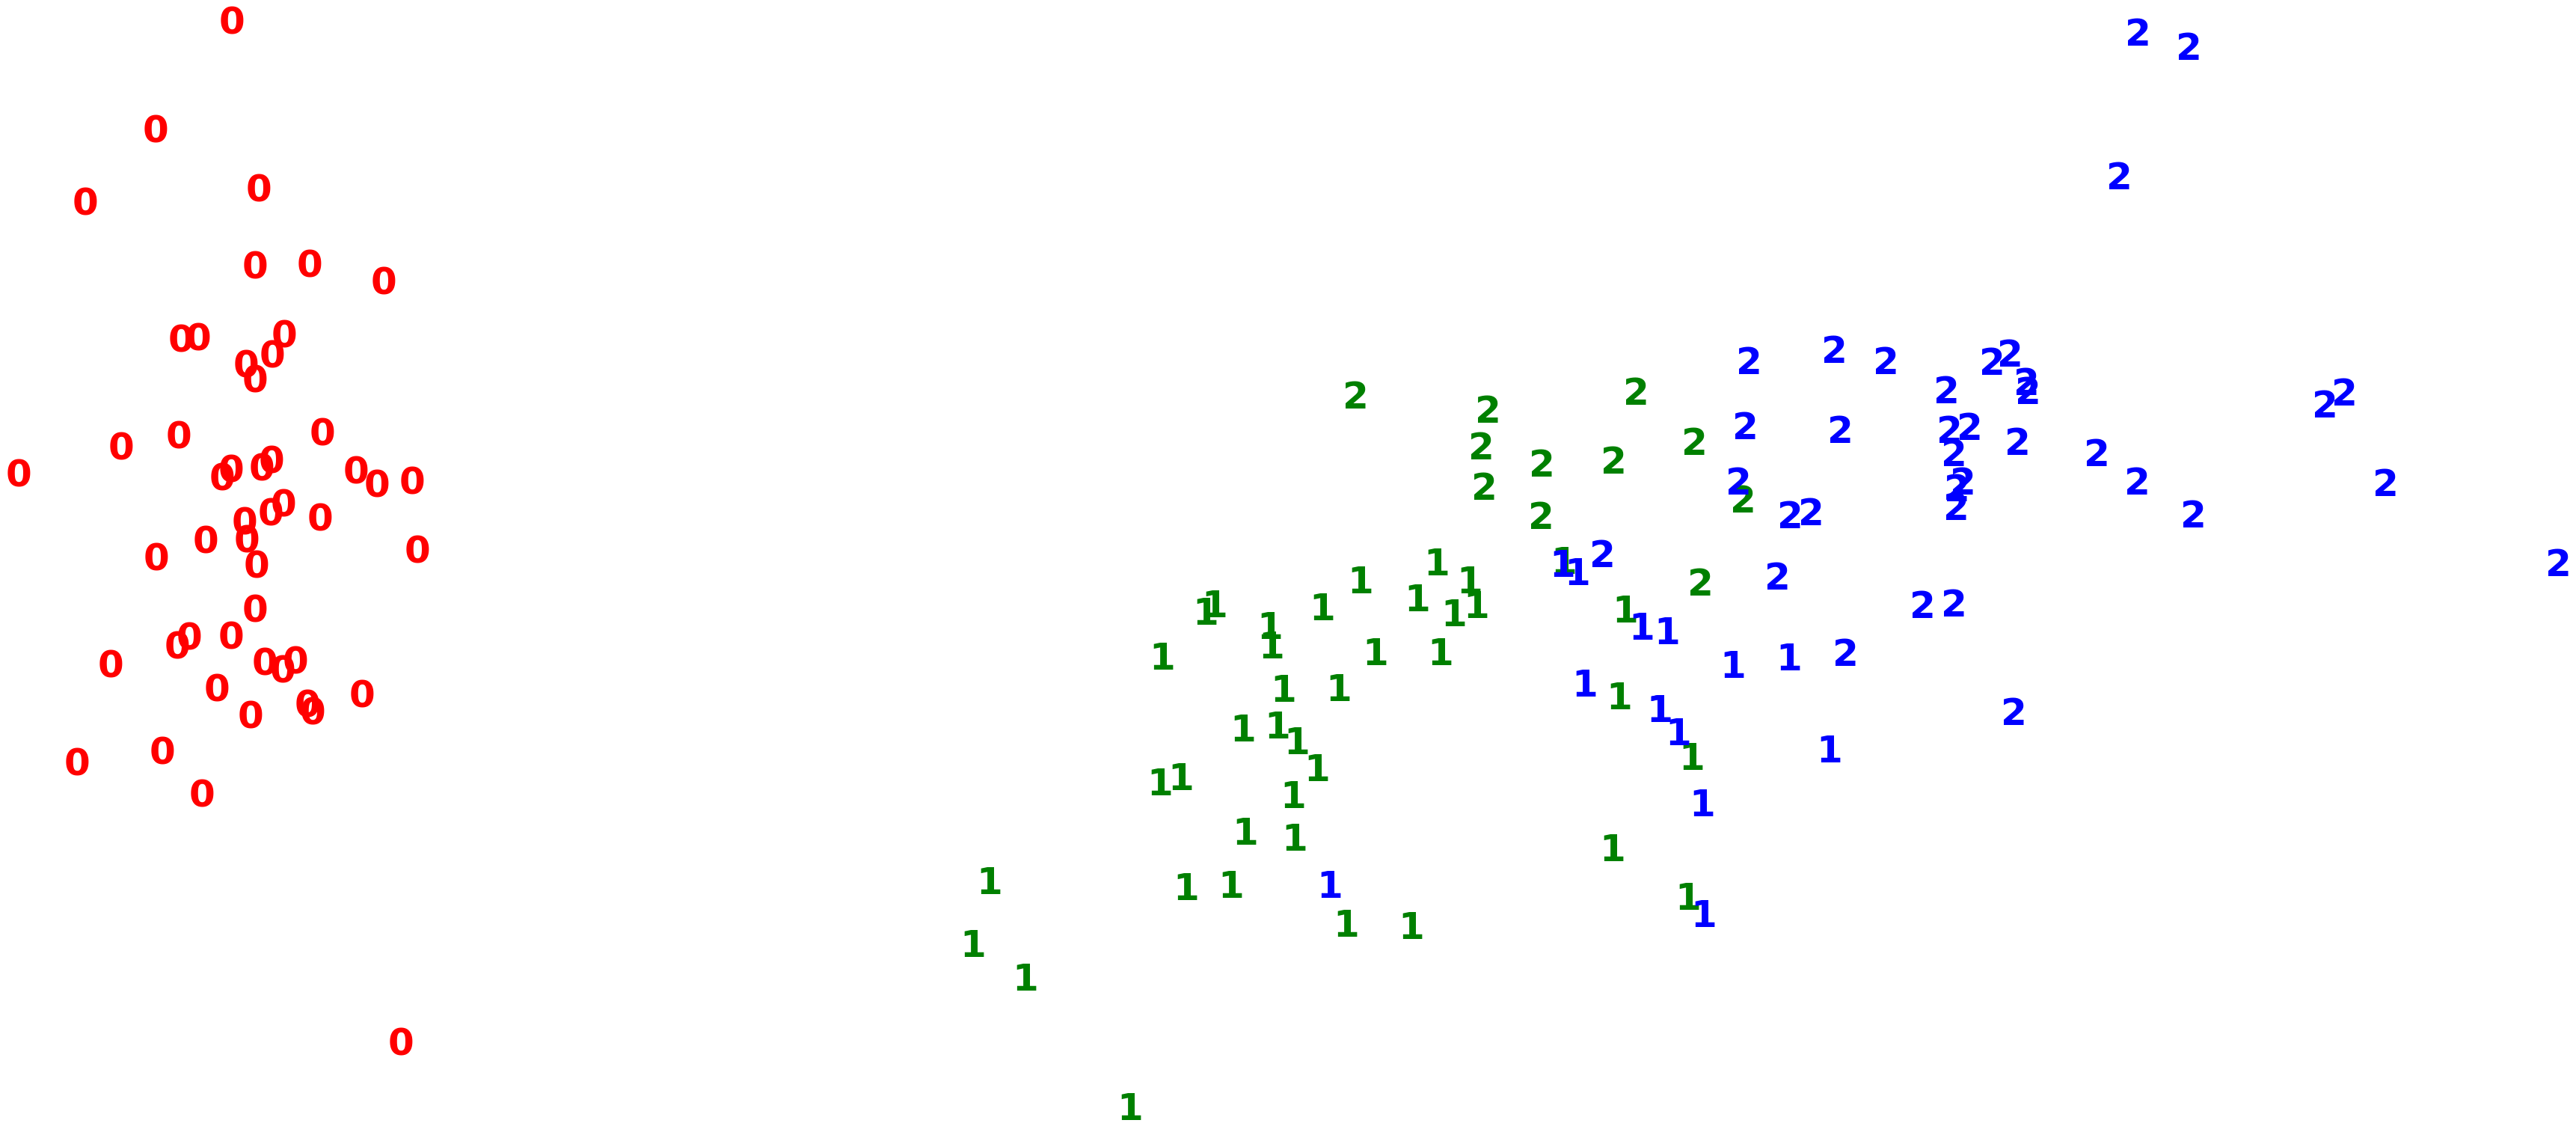

In [89]:
pca = PCA(n_components=4).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = ['red', 'green', 'blue']
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It was clear from testing different Ks that K=3 was the best choice. Obviously this makes sense because we know there are three categories of iris in this dataset. K > 3 assigns multiple values to the red grouping which we do not want and K = 2 does not accurate split up the second grouping.

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

3. Load the dataset from the Thinkful's database. 

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [91]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [92]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [93]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [94]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=222)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

56.9 ms ± 814 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


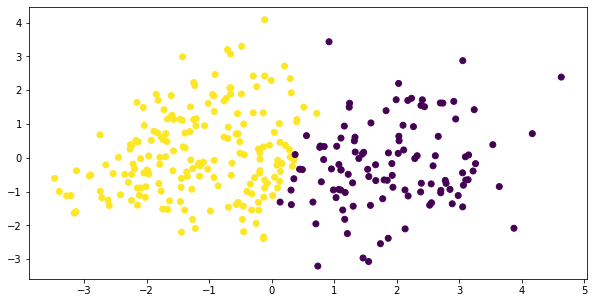

In [96]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(pca[:,0], pca[:,1], c=y_pred)

plt.show()

In [84]:
print(pd.crosstab(y_pred,y))

col_0    0    1
row_0          
0      101   13
1       38  151


Model looks like it is doing well. Classifying 252 out of 304 correctly.